In [1]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.3MB/s 
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 2.2.3 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.2.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2011'

In [4]:
ls

2011.ipynb*  address_finder.ipynb*  Untitled.ipynb


In [5]:

# data folder path
data_directory = os.path.join('..','data','raw_data/{}/'.format(year))
all_files = glob.glob(os.path.join(data_directory, "*.xlsx")) 
data_directory_saves = os.path.join( '..','data','raw_data','clean_data/')


metadata = os.path.join('..','data','raw_data/parking-citation-metadata.xls')

In [6]:
data_directory

'../data/raw_data/2011/'

In [7]:
ls ../data/raw_data/2011/

'Parking Citations in T2 07-01-2010 to 06-30-2011 as of 05-01-2016.xlsx'


In [8]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xlsx")) 
#df_from_each_file = (pd.read_excel(f) for f in all_files)
#df   = pd.concat(df_from_each_file, ignore_index=True)

In [9]:
all_files[0]

'../data/raw_data/2011/Parking Citations in T2 07-01-2010 to 06-30-2011 as of 05-01-2016.xlsx'

In [10]:
%%time
df = pd.read_excel(all_files[0])

CPU times: user 46.9 s, sys: 1.41 s, total: 48.3 s
Wall time: 48.4 s


In [13]:
#df.info()

In [14]:
df.head()

,CON_UID,Entity_UID,Vehicle_Plate_Anon,Invoice_Number,Invoice_Date,Invoice_Due_Date,Entity_Type,Billing_State_Abbrev,Billing_Postal_Code,Event_Block_Number,...,CON_IS_NO_CONTEST,Initial_Citation_Amount,Amount_Outstanding,Citation_Officer,Citation_Officer_UID,Vehicle_Make,Vehicle_Year,Vehicle_Style,Latitude,Longitude
0,612399,441213.0,1051794,V10117186,2011-06-16 14:30:00,2011-07-16 14:30:00,Individual,TX,77078,7426,...,0,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008.0,,NaN,NaN
1,612401,441214.0,612548,V10367917,2011-06-14 12:20:00,2011-07-14 12:20:00,Individual,TX,77086,2300,...,0,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997.0,,NaN,NaN
2,612402,440150.0,225966,V10367926,2011-06-17 16:13:00,2011-07-17 16:13:00,Individual,TX,77080,2300,...,0,205.0,0.0,"WORM, JOHN",2266,Mercury,NaN,,NaN,NaN
3,612470,441216.0,669745,V10272997,2011-06-05 09:49:00,2011-07-05 09:49:00,Individual,TX,77078,2955,...,0,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998.0,,NaN,NaN
4,612513,434221.0,1010459,V20016841,2011-06-07 11:03:00,2011-07-07 11:03:00,Individual,TX,77007,4400,...,0,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003.0,Sports Utility Veh,NaN,NaN


## Metadata


https://www.houstontx.gov/parking/faq.html#boothearing

| Column                    | Description                                                                                                                                                                                                                                                                                                                           |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CON_UID                   | System generated unique identifier for the parking citation                                                                                                                                                                                                                                                                           |
| Entity_UID                | Unique ID for the entity that received the parking citation. Sometimes an individual or company can have multiple entity IDs due to matching issues.                                                                                                                                                                                  |
| Vehicle_Plate_Anon        | An anonymized version of the plate number. This anonymized number will always be consistent across files released on the same date (i.e. all files released on 5/1/2016) but may change from one release to the next (i.e. the assigned number may change 5/1/2016 to the 5/1/2017 release) to  ensure anonymity                      |
| Invoice_Number            | The unique citation's number commonly referred to by the customer and Parking Management                                                                                                                                                                                                                                              |
| Invoice_Date              | The date the citation was issued (usually the event date, but sometimes re-issued afterwards if a new owner is found)                                                                                                                                                                                                                 |
| Invoice_Due_Date          | The due date of the citation's payment                                                                                                                                                                                                                                                                                                |
| Entity_Type               | The type of entity receiving the citation                                                                                                                                                                                                                                                                                             |
| Billing_State_Abbrev      | The state the entity resides in                                                                                                                                                                                                                                                                                                       |
| Billing_Postal_Code       | The zip code the entity receiving the parking citation resides in                                                                                                                                                                                                                                                                     |
| Event_Block_Number        | The city block the citation was issued in                                                                                                                                                                                                                                                                                             |
| Event_Street              | The city street the citation was issued on                                                                                                                                                                                                                                                                                            |
| Event_Date                | The issue date of the citation                                                                                                                                                                                                                                                                                                        |
| Citation_Status           | The current status of the citation                                                                                                                                                                                                                                                                                                    |
| Meter_Violation           | Whether the citation is tied directly to a meter violation (0=False or unknown/ 1=true)                                                                                                                                                                                                                                               |
| Meter_Number              | The meter number associated with the violation                                                                                                                                                                                                                                                                                        |
| Citation_Description_Code | The code for why the citation was issued                                                                                                                                                                                                                                                                                              |
| Citation_Description      | Description of why the citation was issued                                                                                                                                                                                                                                                                                            |
| VIC_LEGAL_DESCRIPTION     | Legal description of why the citation was issued                                                                                                                                                                                                                                                                                      |
| CON_IS_WRITEOFF           | Was the citation written off (0=false/1=true)                                                                                                                                                                                                                                                                                         |
| CON_IS_WARNING            | Is the citation a warning rather than a fine (0=false/1=true)                                                                                                                                                                                                                                                                         |
| CON_IS_VOID               | Has the citation been voided (0=false/1=true)                                                                                                                                                                                                                                                                                         |
| CON_IS_UNDER_APPEAL       | Is the citation under appeal (0=false/1=true)                                                                                                                                                                                                                                                                                         |
| CON_IS_UNCOLLECTABLE      | Is the citation uncollectable (0=false/1=true)                                                                                                                                                                                                                                                                                        |
| CON_IS_SPECIAL_STATUS     | Does the citation has a special status (0=false/1=true)                                                                                                                                                                                                                                                                               |
| CON_IS_SOURCE_MANUAL      | Was the citation manually entered into the parking management system (0=false/1=true). This usually occurs for older tickets that were issued prior to the implementation of T2 when a customer comes in voluntarily to pay. This can also happen when a volunteer issues a handicap parking citation or a handheld device is broken. |
| CON_IS_PREENTERED         |                                                                                                                                                                                                                                                                                                                                       |
| CON_IS_ON_ADMIN_HOLD      | Is the citation on administrative hold (0=false/1=true)                                                                                                                                                                                                                                                                               |
| CON_IS_NO_CONTEST         |                                                                                                                                                                                                                                                                                                                                       |
| Initial_Citation_Amount   | The initial amount (or face value) of the citation when it was issued                                                                                                                                                                                                                                                                 |
| Amount_Outstanding        | The amount currently due, including any delinquent collection fees imposed                                                                                                                                                                                                                                                            |
| Citation_Officer          | Issuing Officer                                                                                                                                                                                                                                                                                                                       |
| Citation_Officer_UID      | Issue Officer's unique identifier in the system                                                                                                                                                                                                                                                                                       |
| Vehicle_Make              |                                                                                                                                                                                                                                                                                                                                       |
| Vehicle_Year              |                                                                                                                                                                                                                                                                                                                                       |
| Vehicle_Style             |                                                                                                                                                                                                                                                                                                                                       |
| Latitude                  | The latitude reported by the handheld device. Handheld devices started reporting issuing location in mid-2014 but sometimes the coordinators are not captured                                                                                                                                                                         |
| Longitude                 | The longitude reported by the handheld device. Handheld devices started reporting issuing location in mid-2014 but sometimes the coordinators are not captured                                                                                                                                                                        |

# Check for missing values

In [15]:
df.apply(lambda x: sum(x.isnull()))

CON_UID                           0
Entity_UID                    37004
Vehicle_Plate_Anon                0
Invoice_Number                    0
Invoice_Date                      0
Invoice_Due_Date                  0
Entity_Type                   37004
Billing_State_Abbrev          37109
Billing_Postal_Code           37161
Event_Block_Number             2930
Event_Street                      1
Event_Date                        0
Citation_Status                   0
Meter_Violation                   0
Meter_Number                 137715
Citation_Description_Code         0
Citation_Description              0
VIC_LEGAL_DESCRIPTION          2050
CON_IS_WRITEOFF                   0
CON_IS_WARNING                    0
CON_IS_VOID                       0
CON_IS_UNDER_APPEAL               0
CON_IS_UNCOLLECTABLE              0
CON_IS_SPECIAL_STATUS             0
CON_IS_SOURCE_MANUAL              0
CON_IS_PREENTERED                 0
CON_IS_ON_ADMIN_HOLD              0
CON_IS_NO_CONTEST           

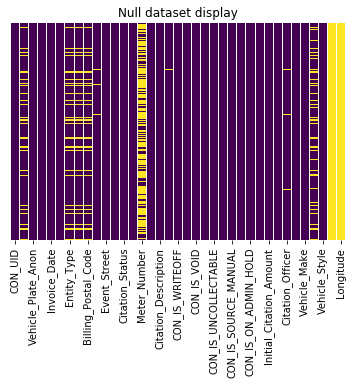

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup
- lowercase column names
- check for dtypes

In [17]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [18]:
df.head(11)

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,invoice_date,invoice_due_date,entity_type,billing_state_abbrev,billing_postal_code,event_block_number,...,con_is_no_contest,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year,vehicle_style,latitude,longitude
0,612399,441213.0,1051794,V10117186,2011-06-16 14:30:00,2011-07-16 14:30:00,Individual,TX,77078,7426,...,0,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008.0,,NaN,NaN
1,612401,441214.0,612548,V10367917,2011-06-14 12:20:00,2011-07-14 12:20:00,Individual,TX,77086,2300,...,0,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997.0,,NaN,NaN
2,612402,440150.0,225966,V10367926,2011-06-17 16:13:00,2011-07-17 16:13:00,Individual,TX,77080,2300,...,0,205.0,0.0,"WORM, JOHN",2266,Mercury,NaN,,NaN,NaN
3,612470,441216.0,669745,V10272997,2011-06-05 09:49:00,2011-07-05 09:49:00,Individual,TX,77078,2955,...,0,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998.0,,NaN,NaN
4,612513,434221.0,1010459,V20016841,2011-06-07 11:03:00,2011-07-07 11:03:00,Individual,TX,77007,4400,...,0,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003.0,Sports Utility Veh,NaN,NaN
5,612528,NaN,90559,V20024846,2011-06-19 22:20:00,2011-07-19 22:20:00,NaN,NaN,NaN,2727,...,0,500.0,780.0,"KORNICZKY, JENNIFER",3784,Nissan,NaN,,NaN,NaN
6,612529,NaN,305710,V20011993,2011-06-01 18:11:00,2011-07-01 18:11:00,NaN,NaN,NaN,10245,...,0,500.0,0.0,"SMITH, ROBERT",2155,Dodge,NaN,,NaN,NaN
7,612539,441221.0,463906,V20016805,2011-06-01 19:58:00,2011-07-01 19:58:00,Individual,TX,77080,10123,...,0,500.0,780.0,"SMITH, ROBERT",2155,Nissan,2004.0,,NaN,NaN
8,612541,441223.0,589955,V20022423,2011-06-13 14:00:00,2011-07-13 14:00:00,Individual,TX,77096,7731,...,0,500.0,0.0,"RAMOS, DON",2741,Nissan,2010.0,,NaN,NaN
9,612549,441224.0,241338,V20016035,2011-06-01 20:03:00,2011-07-01 20:03:00,Individual,TX,77009,7426,...,0,500.0,0.0,"BOUDREAUX, RAYMOND",3782,Ford,1990.0,Van,NaN,NaN


In [19]:
df.dtypes

con_uid                               int64
entity_uid                          float64
vehicle_plate_anon                    int64
invoice_number                       object
invoice_date                 datetime64[ns]
invoice_due_date             datetime64[ns]
entity_type                          object
billing_state_abbrev                 object
billing_postal_code                  object
event_block_number                   object
event_street                         object
event_date                   datetime64[ns]
citation_status                      object
meter_violation                       int64
meter_number                         object
citation_description_code            object
citation_description                 object
vic_legal_description                object
con_is_writeoff                       int64
con_is_warning                        int64
con_is_void                           int64
con_is_under_appeal                   int64
con_is_uncollectable            

# Inspect each col

## `con_uid`: 
### System generated unique identifier for the parking citation
- unique values: 205184

In [20]:
df.con_uid.value_counts(dropna=False)[:10]

526335    1
440962    1
445068    1
455307    1
457354    1
451209    1
453256    1
430727    1
432774    1
426629    1
Name: con_uid, dtype: int64

In [21]:
len(df.con_uid.unique())

205184

## `entity_uid`
### Unique ID for the entity that received the parking citation. Sometimes an individual or company can have multiple entity IDs due to matching issues. 
- 37004 NaN 
- total unique: 127693

In [22]:
df.entity_uid.value_counts(dropna=False)

NaN          37004
 264736.0     1481
 570721.0     1436
 368899.0     1154
 378166.0      715
 296883.0      537
 198240.0      349
 564282.0      249
 334996.0      231
 235394.0      209
 389743.0      176
 254911.0      159
 264125.0      144
 485443.0      128
 369161.0      123
 732783.0       88
 19147.0        80
 334940.0       80
 402932.0       77
 369256.0       76
 302228.0       74
 502191.0       70
 269620.0       69
 403609.0       66
 549713.0       59
 240137.0       58
 369422.0       56
 486951.0       55
 371761.0       52
 370346.0       48
             ...  
 332440.0        1
 332441.0        1
 379236.0        1
 332419.0        1
 332418.0        1
 332417.0        1
 332408.0        1
 379243.0        1
 332401.0        1
 332402.0        1
 284302.0        1
 332403.0        1
 332404.0        1
 332405.0        1
 332406.0        1
 332407.0        1
 295900.0        1
 379242.0        1
 379238.0        1
 332409.0        1
 332410.0        1
 332411.0   

In [23]:
len(df.entity_uid.unique())

127693

## `vehicle_plate_anon`
###  An anonymized version of the plate number. This anonymized number will always be consistent across files released on the same date (i.e. all files released on 5/1/2016) but may change from one release to the next (i.e. the assigned number may change 5/1/2016 to the 5/1/2017 release) to  ensure anonymity
- 168587


In [24]:
df.vehicle_plate_anon.value_counts(dropna=False)[:10]

200677    224
182442    197
116217    190
330974    141
326991    134
290684    102
200966     98
152946     91
130767     87
315258     86
Name: vehicle_plate_anon, dtype: int64

In [25]:
len(df.vehicle_plate_anon.unique())

168587

## `invoice_number`
### The unique citation's number commonly referred to by the customer and Parking Management

In [26]:
df.invoice_number.value_counts(dropna=False)[:10]

HX20001107    1
HX35003947    1
HX18003710    1
HX19004088    1
HX31001079    1
HX1501800     1
P26005567     1
P24435031     1
BH576JKM93    1
HX03002446    1
Name: invoice_number, dtype: int64

## `invoice_date`
### The date the citation was issued (usually the event date, but sometimes re-issued afterwards if a new owner is found)

In [27]:
df.invoice_date.value_counts(dropna=False)[:10]

2011-01-21 01:00:00    34
2011-04-20 01:00:00    25
2011-01-26 01:00:00    24
2011-01-28 01:00:00    23
2011-01-25 01:00:00    20
2010-12-22 01:00:00    20
2011-01-04 01:00:00    20
2011-04-18 01:00:00    18
2011-02-21 01:00:00    18
2011-03-15 01:00:00    18
Name: invoice_date, dtype: int64

## `invoice_due_date`
### The due date of the citation's payment

In [28]:
df.invoice_due_date.value_counts(dropna=False)[:10]

2011-02-20 01:00:00    34
2011-05-20 01:00:00    25
2011-02-25 01:00:00    24
2011-02-27 01:00:00    23
2011-01-21 01:00:00    20
2011-02-24 01:00:00    20
2011-02-03 01:00:00    20
2011-06-09 01:00:00    18
2011-05-21 01:00:00    18
2011-04-14 01:00:00    18
Name: invoice_due_date, dtype: int64

## `entity_type`
### The type of entity receiving the citation


In [29]:
df.entity_type.value_counts(dropna=False)[:10]

Individual    158848
NaN            37004
Group           9332
Name: entity_type, dtype: int64

## `billing_state_abbrev`
### The state the entity resides in


In [30]:
df.billing_state_abbrev.value_counts(dropna=False)[:10]

TX     159528
NaN     37109
NJ       2064
LA       1051
OK       1009
IL        484
FL        418
AZ        370
MD        247
GA        226
Name: billing_state_abbrev, dtype: int64

## `billing_postal_code`
### The zip code the entity receiving the parking citation resides in


In [31]:
df.billing_postal_code.value_counts(dropna=False)[:10]

NaN      37161
77007     3072
77009     2675
77004     2405
77006     2264
77008     2158
77019     2045
08054     1965
77057     1942
77037     1868
Name: billing_postal_code, dtype: int64

## `event_block_number`
### The city block the citation was issued in


In [32]:
df.event_block_number.value_counts(dropna=False)[:10]

900     12554
1000    11662
1400    10988
1100    10956
1200     8933
800      8840
500      8251
1300     7367
1500     7204
700      6911
Name: event_block_number, dtype: int64

## `event_street`
### The city street the citation was issued on


In [33]:
df.event_street.value_counts(dropna=False)[:10]

TEXAS ST       6906
CAROLINE ST    5903
CAPITOL ST     5334
WALKER ST      5287
MCKINNEY ST    4931
AUSTIN ST      4485
HERMANN DR     4195
LAMAR ST       4115
TRAVIS ST      3647
DALLAS ST      3624
Name: event_street, dtype: int64

## `event_date`
### The issue date of the citation


In [34]:
df.event_date.value_counts(dropna=False)[:10]

2011-01-21 01:00:00    34
2011-04-20 01:00:00    25
2011-01-26 01:00:00    24
2011-01-28 01:00:00    23
2011-01-25 01:00:00    20
2010-12-22 01:00:00    20
2011-01-04 01:00:00    20
2011-04-18 01:00:00    18
2011-02-21 01:00:00    18
2011-03-15 01:00:00    18
Name: event_date, dtype: int64

## `citation_status`
### The current status of the citation


In [36]:
df.citation_status.value_counts(dropna=False)

Zero Balance             158656
Unpaid                    45829
Appeal No Balance Due       450
Inactive                    236
Appeal Balance Due           13
Name: citation_status, dtype: int64

## `meter_violation`
### Whether the citation is tied directly to a meter violation (0=False or unknown/ 1=true)


In [37]:
df.meter_violation.value_counts(dropna=False)

0    131213
1     73971
Name: meter_violation, dtype: int64

## `meter_number`
### The meter number associated with the violation


In [38]:
df.meter_number.value_counts(dropna=False)[:10]

NaN        137715
PRA900        635
TEX1101       616
FRA903        512
MCL14         497
MCL11         493
FRA901        460
SIGN          448
MCL10         439
MCL09         428
Name: meter_number, dtype: int64

## `citation_description_code`
### The code for why the citation was issued


In [39]:
df.citation_description_code.value_counts(dropna=False)[:10]

PK-01     52570
PK-16     40527
PK-19     10055
PK-21      9364
PK-17      8523
PK-20      8382
APK-01     7260
APK-16     6955
PK-02      6685
PK-13      6317
Name: citation_description_code, dtype: int64

## `citation_description`
### Description of why the citation was issued


In [40]:
df.citation_description.value_counts(dropna=False)[:10]

PK01- Parking meter expired         52570
PK16- Parked in a tow away zone     40527
PK19 - Other parking violation      10055
PK21- Parked in handicapped zone     9364
PK17- No parking anytime             8523
PK20-More than 18 in. right curb     8382
APK-01 - Parking Meter Expired       7260
APK-16 - Parked in tow-away zone     6955
PK02- Overtime parking               6685
PK13- Blocking/parked on sidewk      6317
Name: citation_description, dtype: int64

## `vic_legal_description`
### Legal description of why the citation was issued


In [41]:
df.vic_legal_description.value_counts(dropna=False)[:10]

Parking meter expired               52570
Parked in a tow away zone           40527
Other parking violation             10055
Parked in a handicapped zone         9364
No parking anytime                   8523
Parked more than 18in from right     8382
Parking Meter Expired                7260
Parked in a tow-away zone            6955
Parked non-commercial vehicle in     6718
Overtime parking                     6685
Name: vic_legal_description, dtype: int64

## `con_is_writeoff`
### Was the citation written off (0=false/1=true)


In [42]:
df.con_is_writeoff.value_counts(dropna=False)

0    205184
Name: con_is_writeoff, dtype: int64

## `con_is_warning `
### Is the citation a warning rather than a fine (0=false/1=true)


In [43]:
df.con_is_warning.value_counts(dropna=False)

0    204258
1       926
Name: con_is_warning, dtype: int64

## `con_is_void`
### Has the citation been voided (0=false/1=true)


In [44]:
df.con_is_void.value_counts(dropna=False)

0    204948
1       236
Name: con_is_void, dtype: int64

## `con_is_under_appeal`
### Is the citation under appeal (0=false/1=true)


In [45]:
df.con_is_under_appeal.value_counts(dropna=False)

0    204721
1       463
Name: con_is_under_appeal, dtype: int64

## `con_is_uncollectable`
### Is the citation uncollectable (0=false/1=true)


In [46]:
df.con_is_uncollectable.value_counts(dropna=False)

0    205184
Name: con_is_uncollectable, dtype: int64

## `con_is_special_status`
### Does the citation has a special status (0=false/1=true)


In [47]:
df.con_is_special_status.value_counts(dropna=False)

0    205184
Name: con_is_special_status, dtype: int64

## `con_is_source_manual`
### Was the citation manually entered into the parking management system (0=false/1=true). This usually occurs for older tickets that were issued prior to the implementation of T2 when a customer comes in voluntarily to pay. This can also happen when a volunteer issues a handicap parking citation or a handheld device is broken.


In [48]:
df.con_is_source_manual.value_counts(dropna=False)

0    162145
1     43039
Name: con_is_source_manual, dtype: int64

## `con_is_preentered `

In [49]:
df.con_is_preentered.value_counts(dropna=False)

0    202995
1      2189
Name: con_is_preentered, dtype: int64

## `con_is_on_admin_hold`
### Is the citation on administrative hold (0=false/1=true)


In [50]:
df.con_is_on_admin_hold.value_counts(dropna=False)

0    205184
Name: con_is_on_admin_hold, dtype: int64

## `con_is_no_contest`

In [76]:
df.con_is_no_contest.value_counts(dropna=False)

0    205184
Name: con_is_no_contest, dtype: int64

## `initial_citation_amount `
### The initial amount (or face value) of the citation when it was issued


In [51]:
df.initial_citation_amount.value_counts(dropna=False)

25.00     66842
35.00     41110
65.00     40527
40.00     10953
205.00     9364
30.00      8662
70.00      6955
250.00     5181
100.00     4617
0.00       2101
300.00     2010
45.00      1663
500.00     1406
55.00      1405
255.00      726
50.00       580
105.00      506
305.00      276
125.00      179
60.00       110
130.00        9
1.00          1
154.84        1
Name: initial_citation_amount, dtype: int64

## `amount_outstanding`
### The amount currently due, including any delinquent collection fees imposed


In [52]:
df.amount_outstanding.value_counts(dropna=False)[:10]

 0.00      158966
 65.00      15731
 78.00       8880
 130.00      7809
 533.00      2016
 71.50       1996
 455.00      1518
 84.50       1348
 136.50      1245
 195.00      1185
 91.00       1025
 97.50        893
 32.50        403
 780.00       301
 461.50       202
-25.00        163
 45.50        161
 201.50       120
 15.00         81
 520.00        81
 18.00         73
 227.50        50
 104.00        50
 30.00         48
 52.00         31
-65.00         30
 39.00         30
-30.00         29
-35.00         26
 266.50        25
            ...  
 513.00         1
 408.00         1
 292.50         1
 415.00         1
 129.00         1
 230.00         1
 270.00         1
 133.25         1
 145.50         1
-10.50          1
-255.00         1
 131.50         1
 51.50          1
 275.00         1
 273.00         1
 35.75          1
 34.00          1
 134.50         1
 96.20          1
 90.57          1
 100.75         1
 29.50          1
 555.00         1
 197.50         1
 101.50   

## `citation_officer`
### Issuing Officer


In [53]:
df.citation_officer.value_counts(dropna=False)[:10]

KIBE, J                  13916
KUNJACHEN,GITHU SHINE     9743
SANCHEZ, DAVID            8931
JACKSON, TERRANCE         8668
VALDEZ, OLGA              8062
COLLINS, TASHA            7921
FREEMAN, VICTORIA         7346
EVANS, AMOS               6851
JONES, ANDRE              6776
WYATT, KEATON             6545
Name: citation_officer, dtype: int64

## `citation_officer_uid `
### Issue Officer's unique identifier in the system


In [54]:
df.citation_officer_uid.value_counts(dropna=False)[:10]

2055    13916
2669     9743
2222     8931
2187     8668
2125     8062
2185     7921
2195     7346
2624     6851
2038     6776
2049     6545
Name: citation_officer_uid, dtype: int64

## `vehicle_make`

In [87]:
df.vehicle_make.value_counts(dropna=False)[:10]

Chevrolet         27487
Ford              27296
Toyota            25523
Honda             17291
Nissan            12802
Dodge              9811
BMW                5630
Lexus              5408
General Motors     4770
Jeep               4658
Name: vehicle_make, dtype: int64

## `vehicle_year`

In [91]:
df.vehicle_year.value_counts(dropna=False)

NaN        49364
 2007.0    15006
 2006.0    13636
 2008.0    13308
 2005.0    11886
 2003.0    10711
 2002.0    10622
 2004.0    10542
 2001.0     9625
 2010.0     9218
 2009.0     8723
 2000.0     8365
 1999.0     6835
 1998.0     5289
 1997.0     4335
 1996.0     3173
 2011.0     2982
 1995.0     2817
 1994.0     2112
 1993.0     1529
 1992.0     1059
 1991.0      862
 1990.0      707
 1989.0      477
 1988.0      462
 1987.0      249
 1986.0      221
 1985.0      143
 1984.0      131
 1983.0       96
           ...  
 1969.0       24
 1976.0       22
 1975.0       22
 1970.0       21
 1973.0       21
 2013.0       20
 1968.0       20
 1974.0       19
 1972.0       19
 1966.0       19
 1971.0       12
 2014.0       11
 2015.0        7
 1964.0        6
 1957.0        5
 1959.0        4
 1965.0        4
 1961.0        4
 1962.0        4
 1963.0        3
 0.0           3
 1960.0        2
 1951.0        2
 1955.0        2
 1956.0        1
 1953.0        1
 1949.0        1
 1930.0       

## `vehicle_style`

In [92]:
df.vehicle_style.value_counts(dropna=False)[:10]

Four Door             95795
                      54490
Truck                 24865
Two Door              16257
Sports Utility Veh     6018
Van                    5993
Station Wagon           229
Hatchback               210
TRAC                    196
4X4                     159
Name: vehicle_style, dtype: int64

## `latitude `
### The latitude reported by the handheld device. Handheld devices started reporting issuing location in mid-2014 but sometimes the coordinators are not captured


In [94]:
df.latitude.value_counts(dropna=False)

NaN           205183
 29.751597         1
Name: latitude, dtype: int64

## `longitude`
### The longitude reported by the handheld device. Handheld devices started reporting issuing location in mid-2014 but sometimes the coordinators are not captured


In [96]:
df.longitude.value_counts(dropna=False)

NaN           205183
-95.354178         1
Name: longitude, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205184 entries, 0 to 205183
Data columns (total 37 columns):
con_uid                      205184 non-null int64
entity_uid                   168180 non-null float64
vehicle_plate_anon           205184 non-null int64
invoice_number               205184 non-null object
invoice_date                 205184 non-null datetime64[ns]
invoice_due_date             205184 non-null datetime64[ns]
entity_type                  168180 non-null object
billing_state_abbrev         168075 non-null object
billing_postal_code          168023 non-null object
event_block_number           202254 non-null object
event_street                 205183 non-null object
event_date                   205184 non-null datetime64[ns]
citation_status              205184 non-null object
meter_violation              205184 non-null int64
meter_number                 67469 non-null object
citation_description_code    205184 non-null object
citation_description         205184 

In [55]:
df.head()

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,invoice_date,invoice_due_date,entity_type,billing_state_abbrev,billing_postal_code,event_block_number,...,con_is_no_contest,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year,vehicle_style,latitude,longitude
0,612399,441213.0,1051794,V10117186,2011-06-16 14:30:00,2011-07-16 14:30:00,Individual,TX,77078,7426,...,0,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008.0,,NaN,NaN
1,612401,441214.0,612548,V10367917,2011-06-14 12:20:00,2011-07-14 12:20:00,Individual,TX,77086,2300,...,0,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997.0,,NaN,NaN
2,612402,440150.0,225966,V10367926,2011-06-17 16:13:00,2011-07-17 16:13:00,Individual,TX,77080,2300,...,0,205.0,0.0,"WORM, JOHN",2266,Mercury,NaN,,NaN,NaN
3,612470,441216.0,669745,V10272997,2011-06-05 09:49:00,2011-07-05 09:49:00,Individual,TX,77078,2955,...,0,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998.0,,NaN,NaN
4,612513,434221.0,1010459,V20016841,2011-06-07 11:03:00,2011-07-07 11:03:00,Individual,TX,77007,4400,...,0,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003.0,Sports Utility Veh,NaN,NaN


## Drop columns

In [56]:
list(df.columns)

['con_uid',
 'entity_uid',
 'vehicle_plate_anon',
 'invoice_number',
 'invoice_date',
 'invoice_due_date',
 'entity_type',
 'billing_state_abbrev',
 'billing_postal_code',
 'event_block_number',
 'event_street',
 'event_date',
 'citation_status',
 'meter_violation',
 'meter_number',
 'citation_description_code',
 'citation_description',
 'vic_legal_description',
 'con_is_writeoff',
 'con_is_warning',
 'con_is_void',
 'con_is_under_appeal',
 'con_is_uncollectable',
 'con_is_special_status',
 'con_is_source_manual',
 'con_is_preentered',
 'con_is_on_admin_hold',
 'con_is_no_contest',
 'initial_citation_amount',
 'amount_outstanding',
 'citation_officer',
 'citation_officer_uid',
 'vehicle_make',
 'vehicle_year',
 'vehicle_style',
 'latitude',
 'longitude']

In [57]:
df = df[['con_uid',
 'entity_uid',
 'vehicle_plate_anon',
 'invoice_number',
 'entity_type',
 'event_block_number',
 'event_street',
 'event_date',
 'citation_status',
 'meter_violation',
 'meter_number',
 'citation_description_code',
 'vic_legal_description',
 'initial_citation_amount',
 'amount_outstanding',
 'citation_officer',
 'citation_officer_uid',
 'vehicle_make',
 'vehicle_year']]

In [124]:
# meter = df[df.meter_violation == 1]
# other = df[df.meter_violation == 0]

### Meter tickets

In [127]:
meter.head()

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,entity_type,event_block_number,event_street,event_date,citation_status,meter_violation,meter_number,citation_description_code,vic_legal_description,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year
14,1080091,NaN,1044199,HX25001706,NaN,1600,TEXAS ST,2010-12-29 10:19:00,Zero Balance,1,NaN,PK-01,Parking meter expired,25.0,0.0,NaN,0,Toyota,NaN
53,411419,377193.0,340298,HX01000785,Individual,1400,LUBBOCK,2010-07-29 09:09:30,Zero Balance,1,MCL06,PK-01,Parking meter expired,25.0,0.0,"HOUSTON, DAN",2031,Ford,2005.0
55,406723,308390.0,466041,HX05000362,Individual,1100,SMITH ST,2010-07-21 12:23:27,Zero Balance,1,SMI1101,PK-02,Overtime parking,25.0,0.0,"EVANS, AMOS",2624,BMW,2009.0
56,406724,386008.0,997902,HX05000363,Individual,700,LAMAR ST,2010-07-21 12:37:16,Zero Balance,1,LAM700,PK-01,Parking meter expired,25.0,0.0,"EVANS, AMOS",2624,Acura,2002.0
58,406726,294038.0,414590,HX05000365,Individual,1200,SAN JACINTO ST,2010-07-21 14:11:34,Zero Balance,1,SAN1202,PK-01,Parking meter expired,25.0,0.0,"EVANS, AMOS",2624,Pontiac,1997.0


In [129]:
meter.citation_description_code.value_counts(dropna=False)

PK-01     52570
APK-01     7260
PK-02      6685
PK-36      5144
PK-38      1321
APK-02      935
PK-37        37
APK-04       19
Name: citation_description_code, dtype: int64

In [130]:
meter.vic_legal_description.value_counts(dropna=False)

Parking meter expired               52570
Parking Meter Expired                7260
Overtime parking                     6685
Parked non-commercial vehicle in     5144
Parked in CVLZ without permit or     1321
Overtime Parking                      935
Parked using CVLZ and not loadin       37
Parked on wrong side of the st         19
Name: vic_legal_description, dtype: int64

## Other tickets

In [132]:
other.citation_description_code.value_counts(dropna=False)[:10]

PK-16     40527
PK-19     10055
PK-21      9364
PK-17      8523
PK-20      8382
APK-16     6955
PK-13      6317
PK-05      5947
PK-12      4617
PK-08      4571
Name: citation_description_code, dtype: int64

In [133]:
other.vic_legal_description.value_counts(dropna=False)[:10]

Parked in a tow away zone           40527
Other parking violation             10055
Parked in a handicapped zone         9364
No parking anytime                   8523
Parked more than 18in from right     8382
Parked in a tow-away zone            6955
Blocking or parking on sidewalk      6317
Parked on street more than 24 ho     5947
Parked within 15 feet of fire hy     4617
Parked in reserved zone              4571
Name: vic_legal_description, dtype: int64

In [134]:
df.head()

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,entity_type,event_block_number,event_street,event_date,citation_status,meter_violation,meter_number,citation_description_code,vic_legal_description,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year
0,612399,441213.0,1051794,V10117186,Individual,7426,AIRLINE DR,2011-06-16 14:30:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008.0
1,612401,441214.0,612548,V10367917,Individual,2300,GESSNER RD,2011-06-14 12:20:00,Unpaid,0,NaN,PK-21,Parked in a handicapped zone,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997.0
2,612402,440150.0,225966,V10367926,Individual,2300,GESSNER RD,2011-06-17 16:13:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"WORM, JOHN",2266,Mercury,NaN
3,612470,441216.0,669745,V10272997,Individual,2955,KIRBY DR,2011-06-05 09:49:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998.0
4,612513,434221.0,1010459,V20016841,Individual,4400,NORTH FWY,2011-06-07 11:03:00,Unpaid,0,NaN,APK-21,Prked in handicapped zone w/o pl,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003.0


In [58]:
df.apply(lambda x: sum(x.isnull()))

con_uid                           0
entity_uid                    37004
vehicle_plate_anon                0
invoice_number                    0
entity_type                   37004
event_block_number             2930
event_street                      1
event_date                        0
citation_status                   0
meter_violation                   0
meter_number                 137715
citation_description_code         0
vic_legal_description          2050
initial_citation_amount           0
amount_outstanding                0
citation_officer               5055
citation_officer_uid              0
vehicle_make                      0
vehicle_year                  49364
dtype: int64

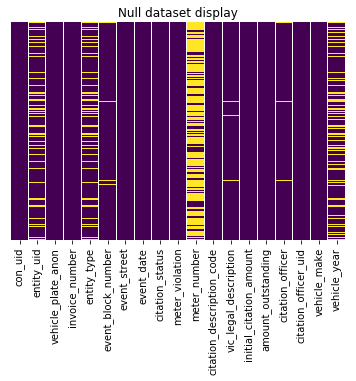

In [59]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## combine block number &  street 

In [61]:
df.head()

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,entity_type,event_block_number,event_street,event_date,citation_status,meter_violation,meter_number,citation_description_code,vic_legal_description,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year
0,612399,441213.0,1051794,V10117186,Individual,7426,AIRLINE DR,2011-06-16 14:30:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008.0
1,612401,441214.0,612548,V10367917,Individual,2300,GESSNER RD,2011-06-14 12:20:00,Unpaid,0,NaN,PK-21,Parked in a handicapped zone,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997.0
2,612402,440150.0,225966,V10367926,Individual,2300,GESSNER RD,2011-06-17 16:13:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"WORM, JOHN",2266,Mercury,NaN
3,612470,441216.0,669745,V10272997,Individual,2955,KIRBY DR,2011-06-05 09:49:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998.0
4,612513,434221.0,1010459,V20016841,Individual,4400,NORTH FWY,2011-06-07 11:03:00,Unpaid,0,NaN,APK-21,Prked in handicapped zone w/o pl,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003.0


In [62]:
df[['event_block_number','event_street']].head()

,event_block_number,event_street
0,7426,AIRLINE DR
1,2300,GESSNER RD
2,2300,GESSNER RD
3,2955,KIRBY DR
4,4400,NORTH FWY


In [63]:
len(df[df.event_block_number.isnull()])

2930

In [64]:
len(df[df.event_block_number.notnull()])

202254

## # fill nan with 0

In [65]:
df.event_street.fillna('UNK',inplace=True)
df.event_block_number.fillna(0,inplace=True)

In [66]:
len(df[df.event_street.isnull()])

0

In [67]:
len(df[df.event_block_number.isnull()])

0

In [68]:
def full_street_address(row):
    '''input col with block_range values
    its split, get med value then appended
    to street name
    return: full street address'''
    if row.event_block_number == 0:
        return row.event_street
    else:
        return row.event_block_number + ' ' +  row.event_street
   

In [69]:
%%time
df['full_address'] = df.apply(full_street_address,axis=1)

CPU times: user 11.9 s, sys: 48 ms, total: 12 s
Wall time: 12 s


In [70]:
df.head()

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,entity_type,event_block_number,event_street,event_date,citation_status,meter_violation,meter_number,citation_description_code,vic_legal_description,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year,full_address
0,612399,441213.0,1051794,V10117186,Individual,7426,AIRLINE DR,2011-06-16 14:30:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008.0,7426 AIRLINE DR
1,612401,441214.0,612548,V10367917,Individual,2300,GESSNER RD,2011-06-14 12:20:00,Unpaid,0,NaN,PK-21,Parked in a handicapped zone,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997.0,2300 GESSNER RD
2,612402,440150.0,225966,V10367926,Individual,2300,GESSNER RD,2011-06-17 16:13:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"WORM, JOHN",2266,Mercury,NaN,2300 GESSNER RD
3,612470,441216.0,669745,V10272997,Individual,2955,KIRBY DR,2011-06-05 09:49:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998.0,2955 KIRBY DR
4,612513,434221.0,1010459,V20016841,Individual,4400,NORTH FWY,2011-06-07 11:03:00,Unpaid,0,NaN,APK-21,Prked in handicapped zone w/o pl,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003.0,4400 NORTH FWY


In [71]:
len(df.full_address.value_counts(dropna=False))

19391

In [72]:
df.full_address.value_counts(dropna=False)[:10]

1400 LUBBOCK          3413
1400 LUBBOCK ST       2532
900 GIRARD ST         2357
Boot Hearing          1782
400 TEXAS ST          1605
1600 CALIFORNIA ST    1577
500 WALKER ST         1345
1300 HERMANN DR       1299
1500 KANE ST          1251
1100 TEXAS ST         1185
Name: full_address, dtype: int64

In [75]:
df.full_address.replace({'1400 LUBBOCK':'1400 LUBBOCK ST'}, inplace=True)

In [76]:
df.full_address.value_counts(dropna=False)[:10]

1400 LUBBOCK ST       5945
900 GIRARD ST         2357
Boot Hearing          1782
400 TEXAS ST          1605
1600 CALIFORNIA ST    1577
500 WALKER ST         1345
1300 HERMANN DR       1299
1500 KANE ST          1251
1100 TEXAS ST         1185
1600 MCKINNEY ST      1126
Name: full_address, dtype: int64

## drop unused columns

In [73]:
df.drop(['event_block_number','event_street'],axis=1,inplace=True)

In [77]:
df.head()

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,entity_type,event_date,citation_status,meter_violation,meter_number,citation_description_code,vic_legal_description,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year,full_address
0,612399,441213.0,1051794,V10117186,Individual,2011-06-16 14:30:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008.0,7426 AIRLINE DR
1,612401,441214.0,612548,V10367917,Individual,2011-06-14 12:20:00,Unpaid,0,NaN,PK-21,Parked in a handicapped zone,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997.0,2300 GESSNER RD
2,612402,440150.0,225966,V10367926,Individual,2011-06-17 16:13:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"WORM, JOHN",2266,Mercury,NaN,2300 GESSNER RD
3,612470,441216.0,669745,V10272997,Individual,2011-06-05 09:49:00,Zero Balance,0,NaN,PK-21,Parked in a handicapped zone,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998.0,2955 KIRBY DR
4,612513,434221.0,1010459,V20016841,Individual,2011-06-07 11:03:00,Unpaid,0,NaN,APK-21,Prked in handicapped zone w/o pl,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003.0,4400 NORTH FWY


In [78]:
df.dtypes

con_uid                               int64
entity_uid                          float64
vehicle_plate_anon                    int64
invoice_number                       object
entity_type                          object
event_date                   datetime64[ns]
citation_status                      object
meter_violation                       int64
meter_number                         object
citation_description_code            object
vic_legal_description                object
initial_citation_amount             float64
amount_outstanding                  float64
citation_officer                     object
citation_officer_uid                  int64
vehicle_make                         object
vehicle_year                        float64
full_address                         object
dtype: object

In [79]:
df.apply(lambda x: sum(x.isnull()))

con_uid                           0
entity_uid                    37004
vehicle_plate_anon                0
invoice_number                    0
entity_type                   37004
event_date                        0
citation_status                   0
meter_violation                   0
meter_number                 137715
citation_description_code         0
vic_legal_description          2050
initial_citation_amount           0
amount_outstanding                0
citation_officer               5055
citation_officer_uid              0
vehicle_make                      0
vehicle_year                  49364
full_address                      0
dtype: int64

In [80]:
df.entity_type.value_counts()

Individual    158848
Group           9332
Name: entity_type, dtype: int64

In [87]:
df.entity_uid.fillna(0,inplace=True)

In [81]:
df.entity_type.fillna('UNK',inplace=True)

In [82]:
df.meter_number.fillna('NA',inplace=True)

In [83]:
df.vic_legal_description.fillna('UNK',inplace=True)

In [84]:
df.citation_officer.fillna('UNK',inplace=True)

In [85]:
df.vehicle_year.fillna('UNK',inplace=True)

In [88]:
df.apply(lambda x: sum(x.isnull()))

con_uid                      0
entity_uid                   0
vehicle_plate_anon           0
invoice_number               0
entity_type                  0
event_date                   0
citation_status              0
meter_violation              0
meter_number                 0
citation_description_code    0
vic_legal_description        0
initial_citation_amount      0
amount_outstanding           0
citation_officer             0
citation_officer_uid         0
vehicle_make                 0
vehicle_year                 0
full_address                 0
dtype: int64

In [89]:
df.head()

,con_uid,entity_uid,vehicle_plate_anon,invoice_number,entity_type,event_date,citation_status,meter_violation,meter_number,citation_description_code,vic_legal_description,initial_citation_amount,amount_outstanding,citation_officer,citation_officer_uid,vehicle_make,vehicle_year,full_address
0,612399,441213.0,1051794,V10117186,Individual,2011-06-16 14:30:00,Zero Balance,0,NA,PK-21,Parked in a handicapped zone,205.0,0.0,"RECTOR, DAVID",2148,Chrysler,2008,7426 AIRLINE DR
1,612401,441214.0,612548,V10367917,Individual,2011-06-14 12:20:00,Unpaid,0,NA,PK-21,Parked in a handicapped zone,205.0,533.0,"WORM, JOHN",2266,Cadillac,1997,2300 GESSNER RD
2,612402,440150.0,225966,V10367926,Individual,2011-06-17 16:13:00,Zero Balance,0,NA,PK-21,Parked in a handicapped zone,205.0,0.0,"WORM, JOHN",2266,Mercury,UNK,2300 GESSNER RD
3,612470,441216.0,669745,V10272997,Individual,2011-06-05 09:49:00,Zero Balance,0,NA,PK-21,Parked in a handicapped zone,205.0,0.0,"KIZER, JEREMY",3785,Ford,1998,2955 KIRBY DR
4,612513,434221.0,1010459,V20016841,Individual,2011-06-07 11:03:00,Unpaid,0,NA,APK-21,Prked in handicapped zone w/o pl,500.0,780.0,"SMITH, ROBERT",2155,Ford,2003,4400 NORTH FWY


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205184 entries, 0 to 205183
Data columns (total 18 columns):
con_uid                      205184 non-null int64
entity_uid                   205184 non-null float64
vehicle_plate_anon           205184 non-null int64
invoice_number               205184 non-null object
entity_type                  205184 non-null object
event_date                   205184 non-null datetime64[ns]
citation_status              205184 non-null object
meter_violation              205184 non-null int64
meter_number                 205184 non-null object
citation_description_code    205184 non-null object
vic_legal_description        205184 non-null object
initial_citation_amount      205184 non-null float64
amount_outstanding           205184 non-null float64
citation_officer             205184 non-null object
citation_officer_uid         205184 non-null int64
vehicle_make                 205184 non-null object
vehicle_year                 205184 non-null objec

## Save

In [93]:
df.to_csv(data_directory_saves+'PC_2011.csv')
